**importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**importing dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Ml/data.csv")

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**printing all the features present**

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df['yr_renovated']

,yr_renovated
0,2005
1,0
2,0
3,0
4,1992
...,...
4595,1979
4596,2009
4597,0
4598,0


In [ ]:
from datetime import datetime
present_year = datetime.now().year
df["build_year"] = present_year-df["yr_built"]
df["renovated_year"] = present_year-df["yr_renovated"]
df.drop(columns={"yr_built","yr_renovated"},inplace = True)

In [ ]:
df["renovated_year"]

,renovated_year
0,20
1,2025
2,2025
3,2025
4,33
...,...
4595,46
4596,16
4597,2025
4598,2025


In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print("-"*30)

date
2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-05-11 00:00:00      2
2014-07-04 00:00:00      2
2014-05-17 00:00:00      1
Name: count, Length: 70, dtype: int64
------------------------------
price
0.000000         49
300000.000000    42
400000.000000    31
600000.000000    29
450000.000000    29
                 ..
691000.000000     1
282766.666667     1
406062.500000     1
473200.000000     1
454790.000000     1
Name: count, Length: 1741, dtype: int64
------------------------------
bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64
------------------------------
bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75  

In [ ]:
df.drop(columns={'date','country','statezip','city','street',"waterfront","view"},inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,build_year,renovated_year
0,3.130000e+05,3.0,1.50,1340,7912,1.5,3,1340,0,70,20
1,2.384000e+06,5.0,2.50,3650,9050,2.0,5,3370,280,104,2025
2,3.420000e+05,3.0,2.00,1930,11947,1.0,4,1930,0,59,2025
3,4.200000e+05,3.0,2.25,2000,8030,1.0,4,1000,1000,62,2025
4,5.500000e+05,4.0,2.50,1940,10500,1.0,4,1140,800,49,33
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,4,1510,0,71,46
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,3,1460,0,42,16
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,3,3010,0,16,2025
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,3,1070,1020,51,2025


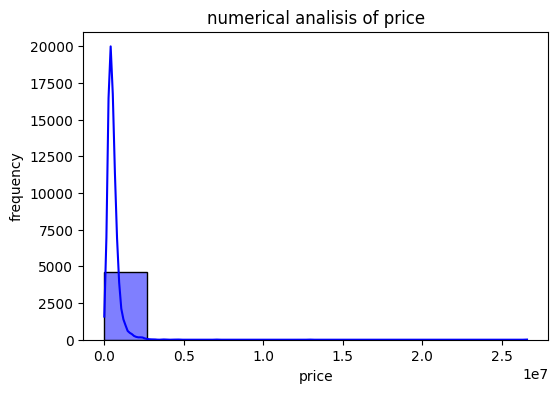

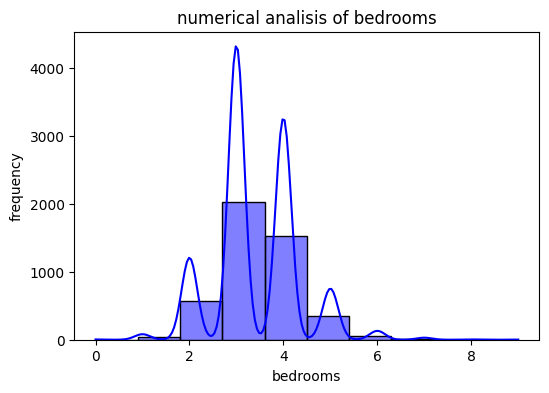

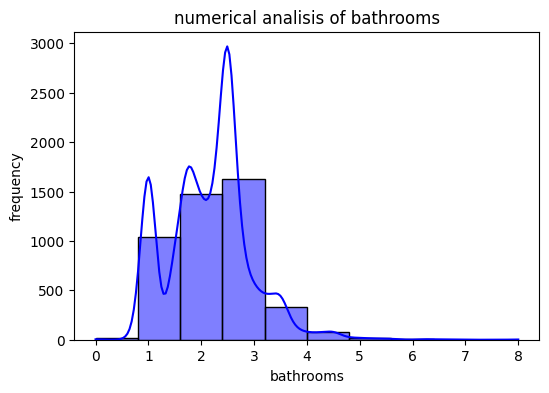

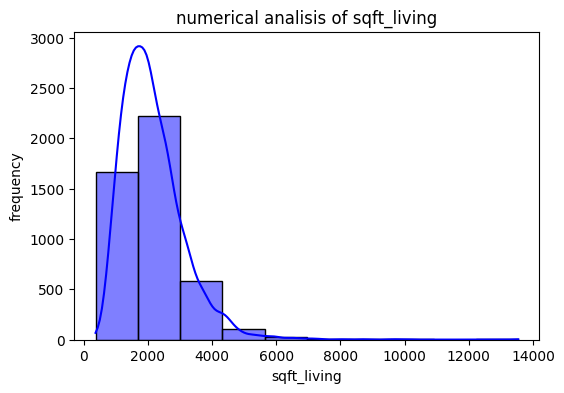

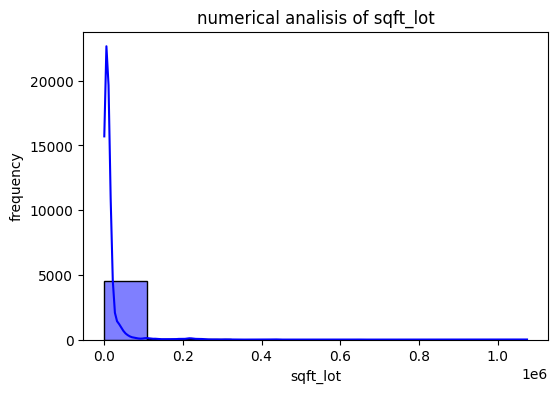

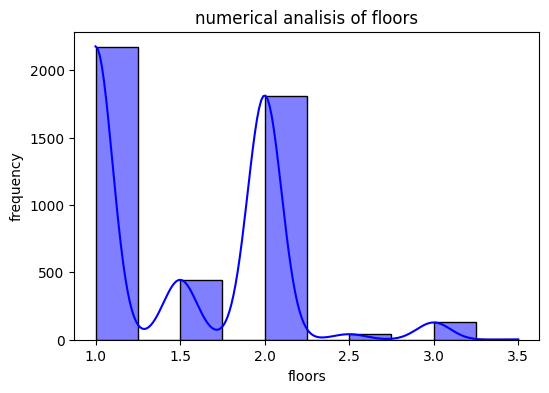

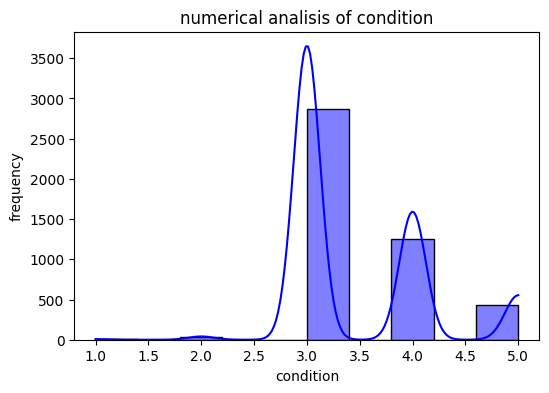

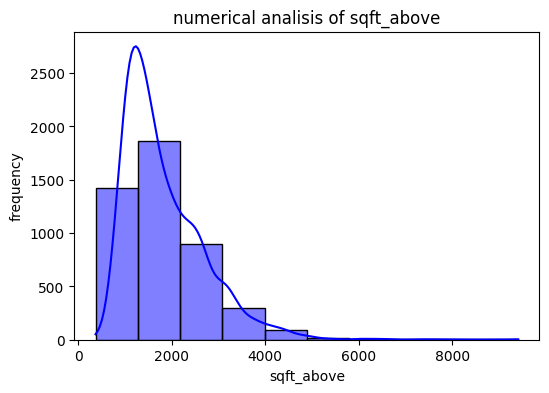

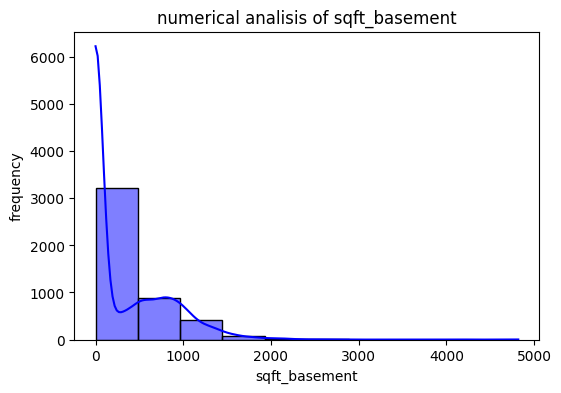

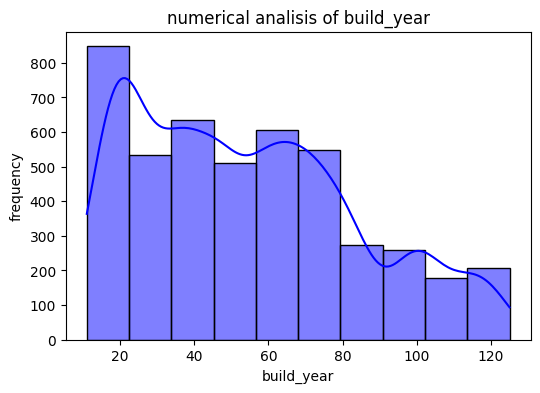

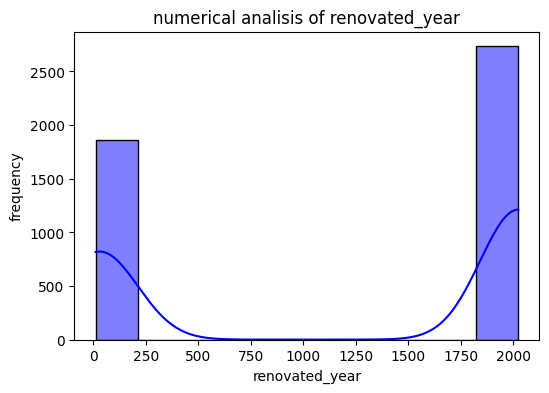

In [ ]:
#numerical analisis

for col in df.columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],color="blue",kde=True,bins=10)
  plt.title(f"numerical analisis of {col}")
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()


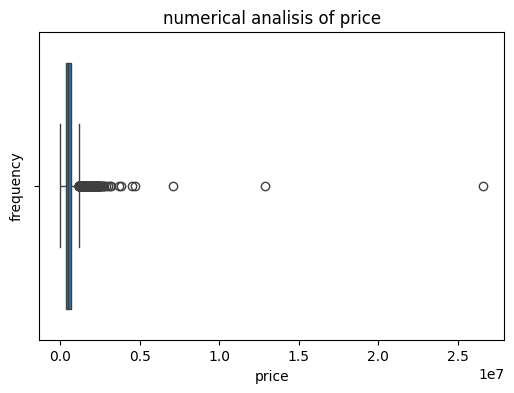

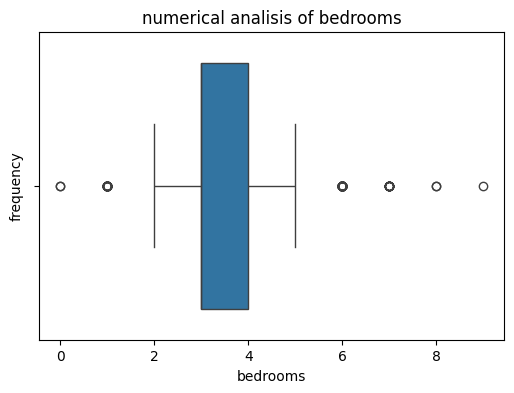

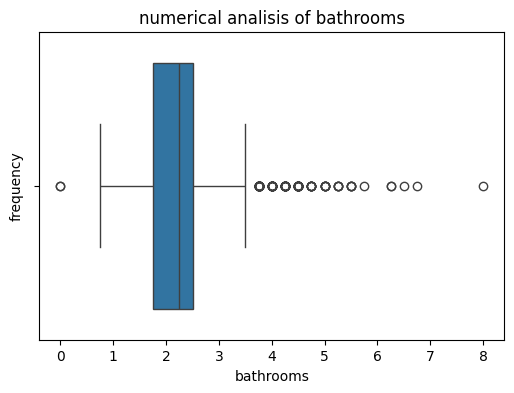

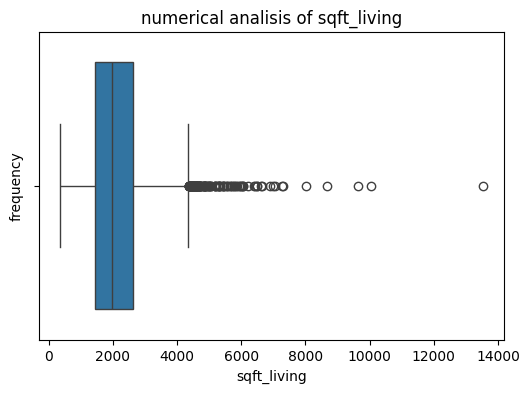

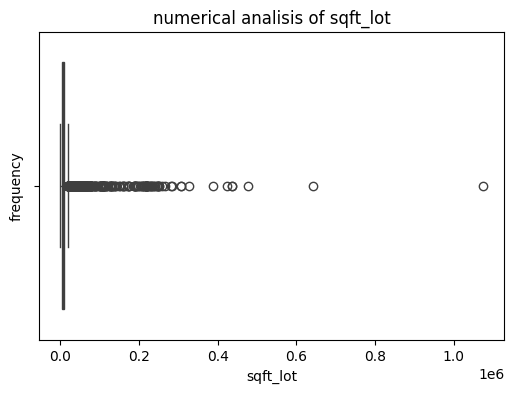

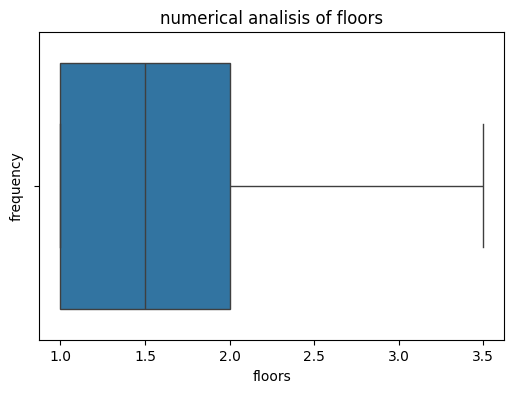

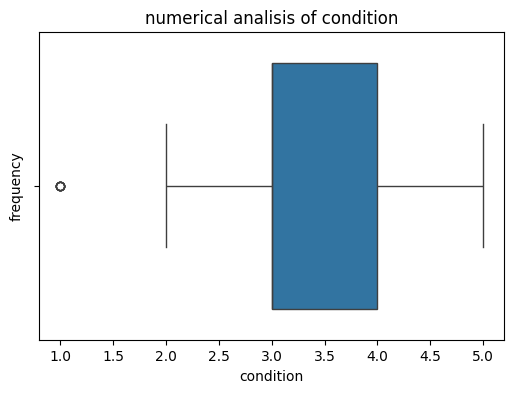

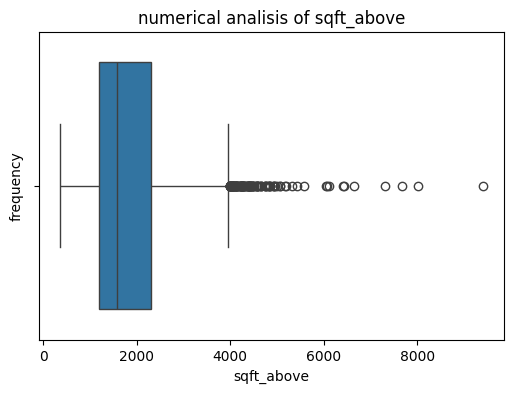

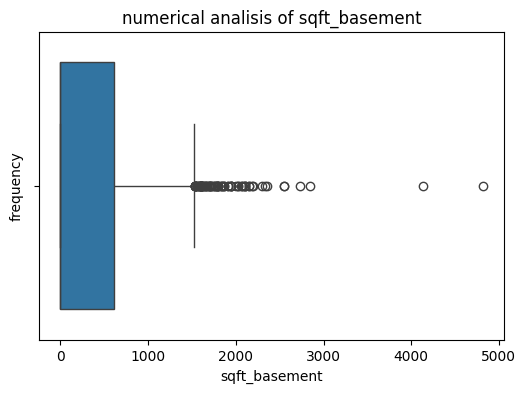

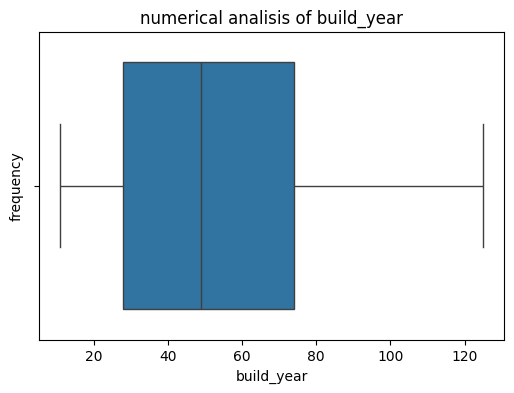

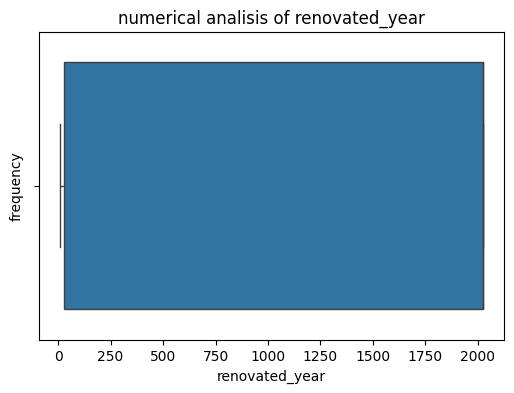

In [ ]:
#numerical analisis

for col in df.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f"numerical analisis of {col}")
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()


In [ ]:
data_cleaned = df.copy()

for col in df.columns:
  Q1 = df[col].quantile(0.33)
  Q3 = df[col].quantile(0.66)
  IQR = Q3-Q1
  lowerbound = Q1-1.5*IQR
  upperbound = Q3+1.5*IQR

  data_cleaned.loc[(data_cleaned[col]>upperbound),col] =upperbound
  data_cleaned.loc[(data_cleaned[col]<lowerbound),col] =lowerbound
  data_cleaned = data_cleaned.copy()

<ipython-input-235-ce8f6b55afda>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14870.85' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[(data_cleaned[col]>upperbound),col] =upperbound
<ipython-input-235-ce8f6b55afda>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[(data_cleaned[col]>upperbound),col] =upperbound
<ipython-input-235-ce8f6b55afda>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5002.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[(data_cleaned[col]>upperbound),col] =upperbound


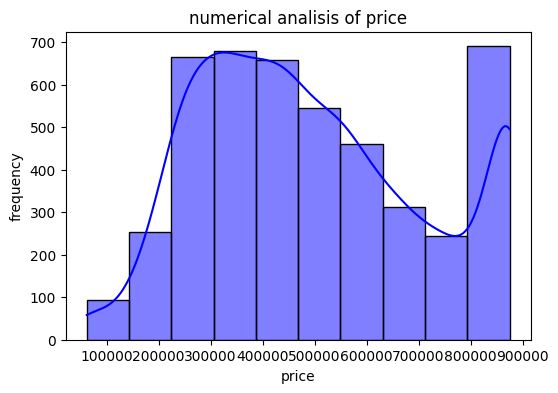

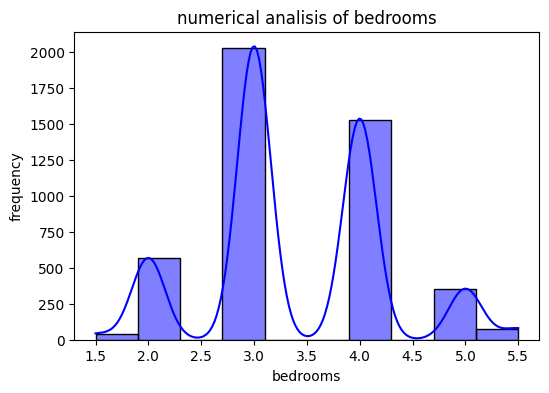

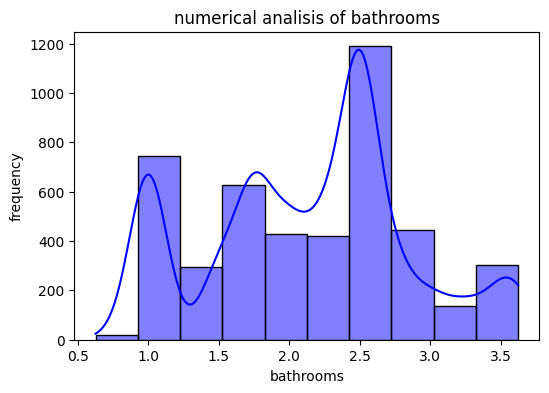

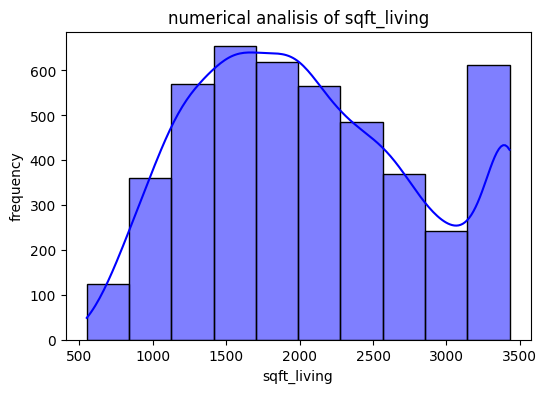

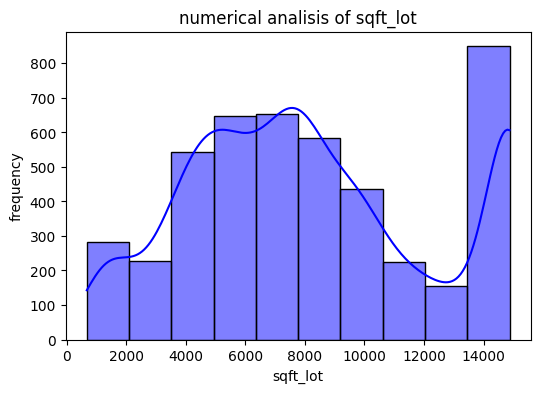

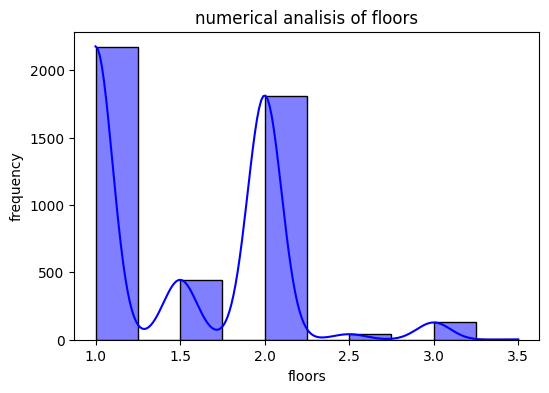

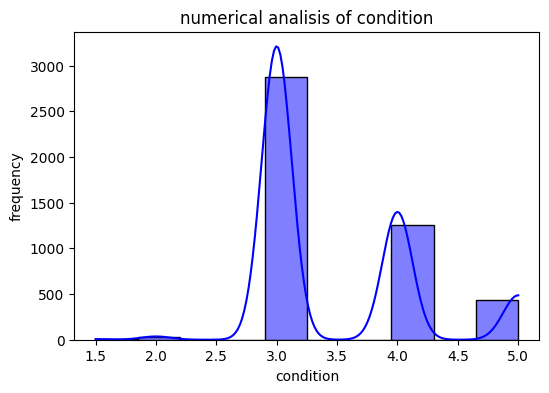

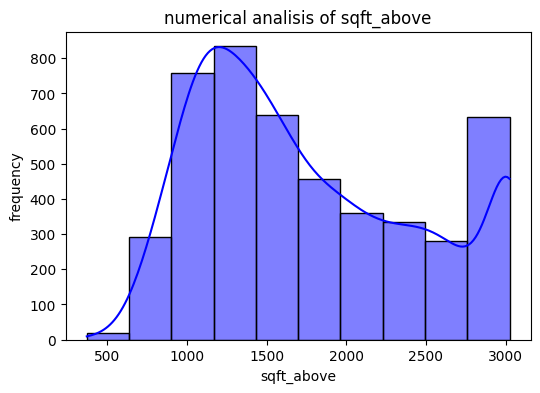

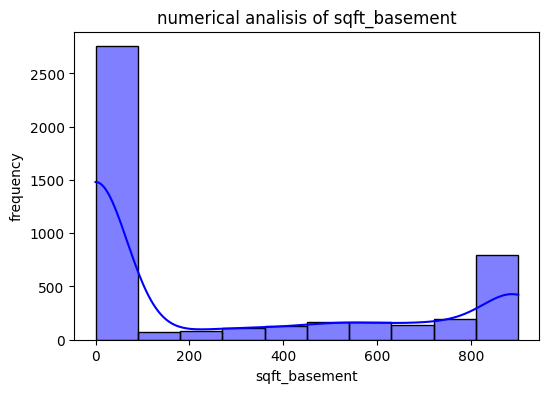

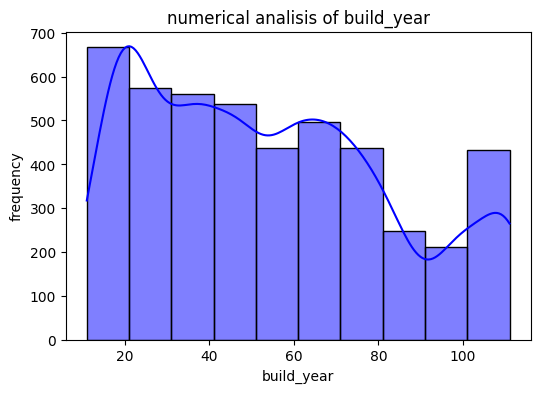

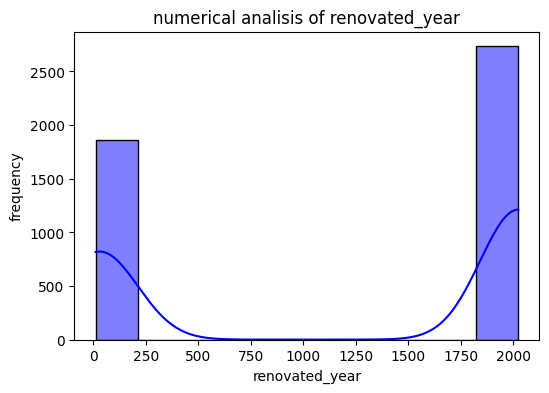

In [ ]:
#numerical analisis

for col in df.columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data_cleaned[col],color="blue",kde=True,bins=10)
  plt.title(f"numerical analisis of {col}")
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()


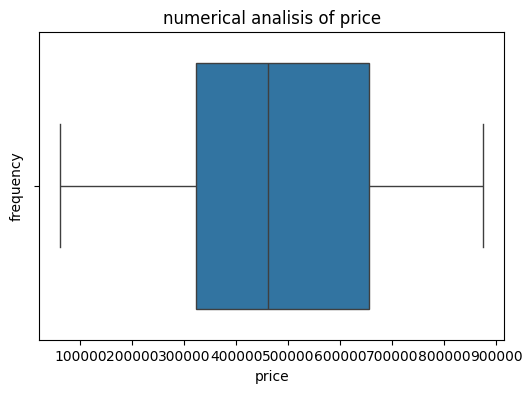

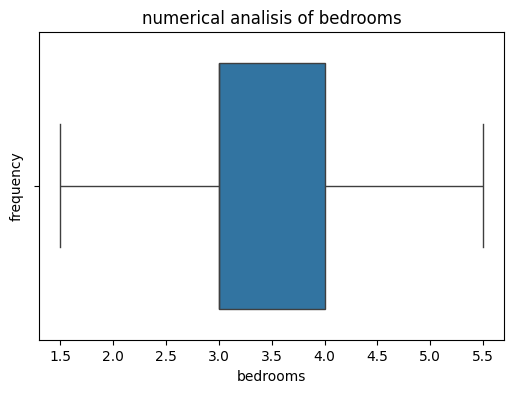

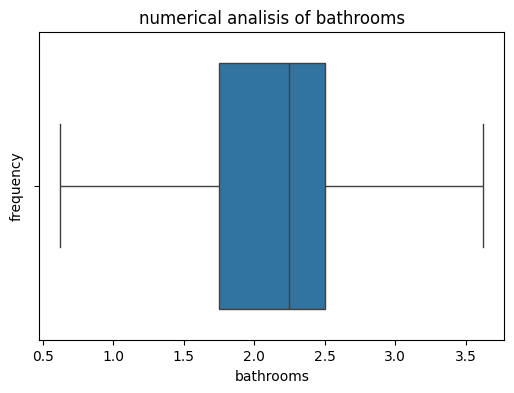

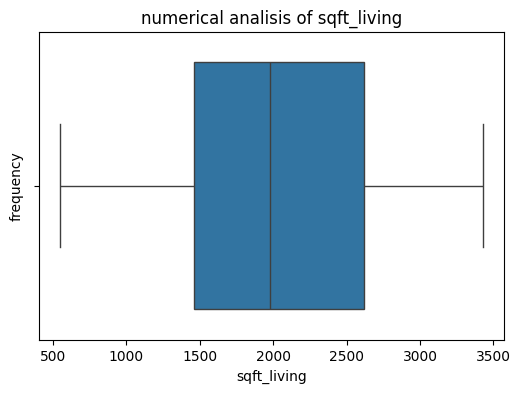

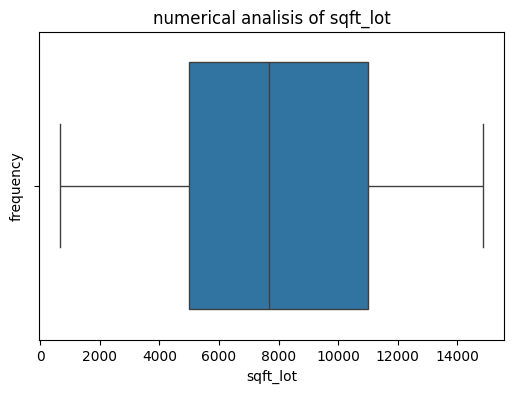

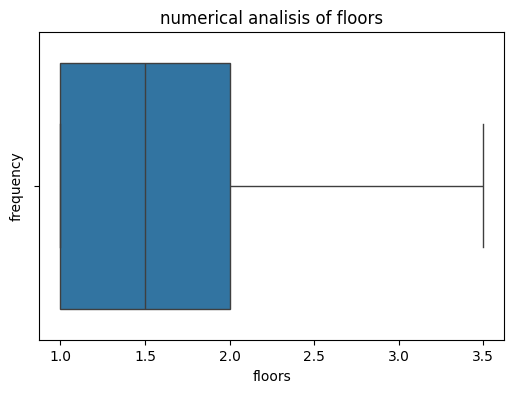

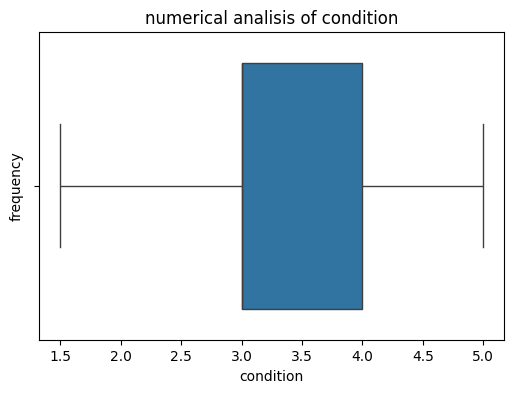

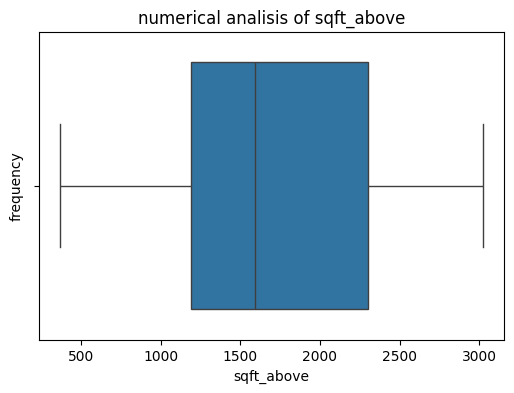

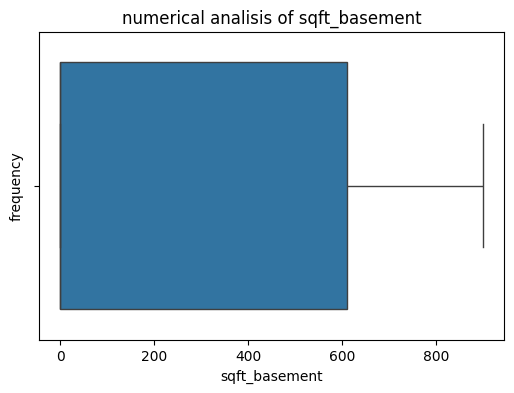

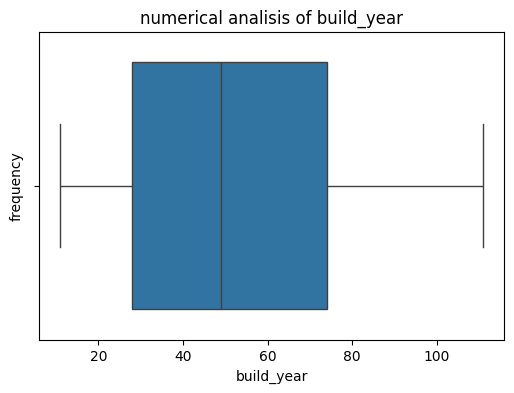

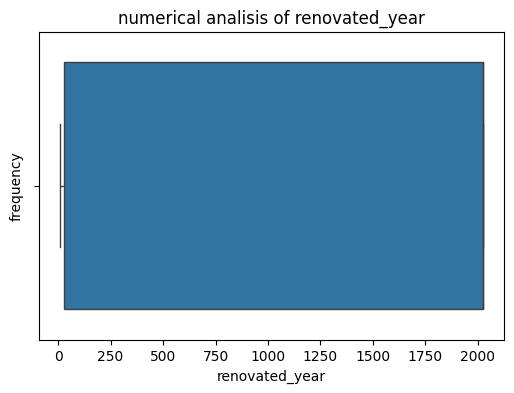

In [ ]:
#numerical analisis

for col in df.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=data_cleaned[col])
  plt.title(f"numerical analisis of {col}")
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()


In [ ]:
df = data_cleaned.copy()

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,build_year,renovated_year
price,1.000000,0.332932,0.500702,0.647635,0.119696,0.296788,0.046206,0.552476,0.237162,-0.054063,0.065599
bedrooms,0.332932,1.000000,0.542420,0.635058,0.236923,0.181811,0.022355,0.509294,0.291520,-0.155790,0.066400
bathrooms,0.500702,0.542420,1.000000,0.748327,0.116725,0.505157,-0.125365,0.677846,0.230197,-0.496444,0.230709
sqft_living,0.647635,0.635058,0.748327,1.000000,0.348514,0.359495,-0.058179,0.855219,0.342900,-0.316234,0.135290
sqft_lot,0.119696,0.236923,0.116725,0.348514,1.000000,-0.215170,0.062202,0.323660,0.057291,-0.046334,-0.032071
floors,0.296788,0.181811,0.505157,0.359495,-0.215170,1.000000,-0.276648,0.560242,-0.287716,-0.480256,0.233996
condition,0.046206,0.022355,-0.125365,-0.058179,0.062202,-0.276648,1.000000,-0.186832,0.227476,0.407348,0.188204
sqft_above,0.552476,0.509294,0.677846,0.855219,0.323660,0.560242,-0.186832,1.000000,-0.155294,-0.447495,0.174986
sqft_basement,0.237162,0.291520,0.230197,0.342900,0.057291,-0.287716,0.227476,-0.155294,1.000000,0.207667,-0.052619
build_year,-0.054063,-0.155790,-0.496444,-0.316234,-0.046334,-0.480256,0.407348,-0.447495,0.207667,1.000000,-0.326687


In [ ]:
df.corr()["price"]

,price
price,1.000000
bedrooms,0.332932
bathrooms,0.500702
sqft_living,0.647635
sqft_lot,0.119696
floors,0.296788
condition,0.046206
sqft_above,0.552476
sqft_basement,0.237162
build_year,-0.054063


In [ ]:
# df["total_sqrt"] = df["sqft_above"]+df["sqft_basement"]
# df.drop(columns={"sqft_above","sqft_basement"},inplace=True)

In [ ]:
# df.drop(columns={"bathrooms"},inplace= True)

In [ ]:
# df

In [ ]:
# df.corr(

# )

In [ ]:
# df.drop(columns={"total_sqrt"},inplace=True)

In [ ]:

x= df.drop(columns={"price"})
y= df["price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from  sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict =lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

0.4429941854228645


In [ ]:
# df

In [ ]:
df_log = df.copy()

In [ ]:
# # Create a binary column: 1 if price > median price, else 0
# median_price = df["price"].median()
# df["price_category"] = (df["price"] > median_price).astype(int)
# Define price thresholds (33rd and 66th percentiles)
low, high = df_log["price"].quantile([0.33, 0.66])

# Categorize prices into 0 (Low), 1 (Medium), and 2 (High)
df_log["price_category"] = pd.cut(df_log["price"], bins=[-float("inf"), low, high, float("inf")], labels=[0, 1, 2]).astype(int)

X = df_log.drop(columns=["price", "price_category"])
y = df_log["price_category"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df_log

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,build_year,renovated_year,price_category
0,313000.000000,3.0,1.50,1340,7912.0,1.5,3.0,1340,0,70,20.0,0
1,874998.750000,5.0,2.50,3430,9050.0,2.0,5.0,3025,280,104,2025.0,2
2,342000.000000,3.0,2.00,1930,11947.0,1.0,4.0,1930,0,59,2025.0,0
3,420000.000000,3.0,2.25,2000,8030.0,1.0,4.0,1000,900,62,2025.0,1
4,550000.000000,4.0,2.50,1940,10500.0,1.0,4.0,1140,800,49,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360.0,1.0,4.0,1510,0,71,46.0,0
4596,534333.333333,3.0,2.50,1460,7573.0,2.0,3.0,1460,0,42,16.0,1
4597,416904.166667,3.0,2.50,3010,7014.0,2.0,3.0,3010,0,16,2025.0,1
4598,203400.000000,4.0,2.00,2090,6630.0,1.0,3.0,1070,900,51,2025.0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_log = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
print(accuracy)


0.4815217391304348
